<a href="https://colab.research.google.com/github/AshwinPradeep01/Crop_recommendation/blob/main/CropRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting the Kaggle Dataset Crop_recommendation Using Kaggle API**

In [7]:
!pip install kaggle

In [8]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download --force -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 67.2MB/s]


In [10]:
!unzip -q /content/crop-recommendation-dataset.zip

# **Importing necessary library**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [13]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [14]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

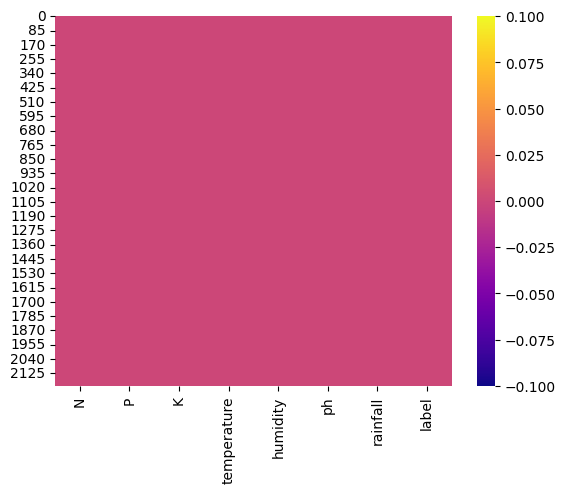

In [15]:
sns.heatmap(df.isnull(), cmap='plasma')

In [16]:
print("size:", df.size)
print("shape:", df.shape)

size: 17600
shape: (2200, 8)


In [17]:
df.keys()

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [18]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [20]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<ipython-input-21-f64cfdd00705>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="plasma", annot =True)


<Axes: >

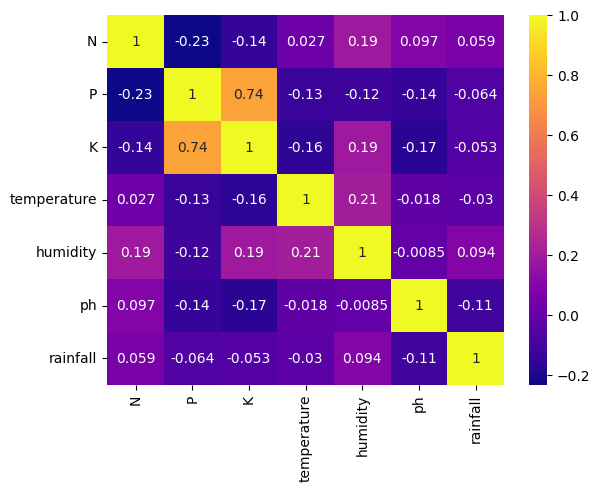

In [21]:
sns.heatmap(df.corr(), cmap="plasma", annot =True)

In [22]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

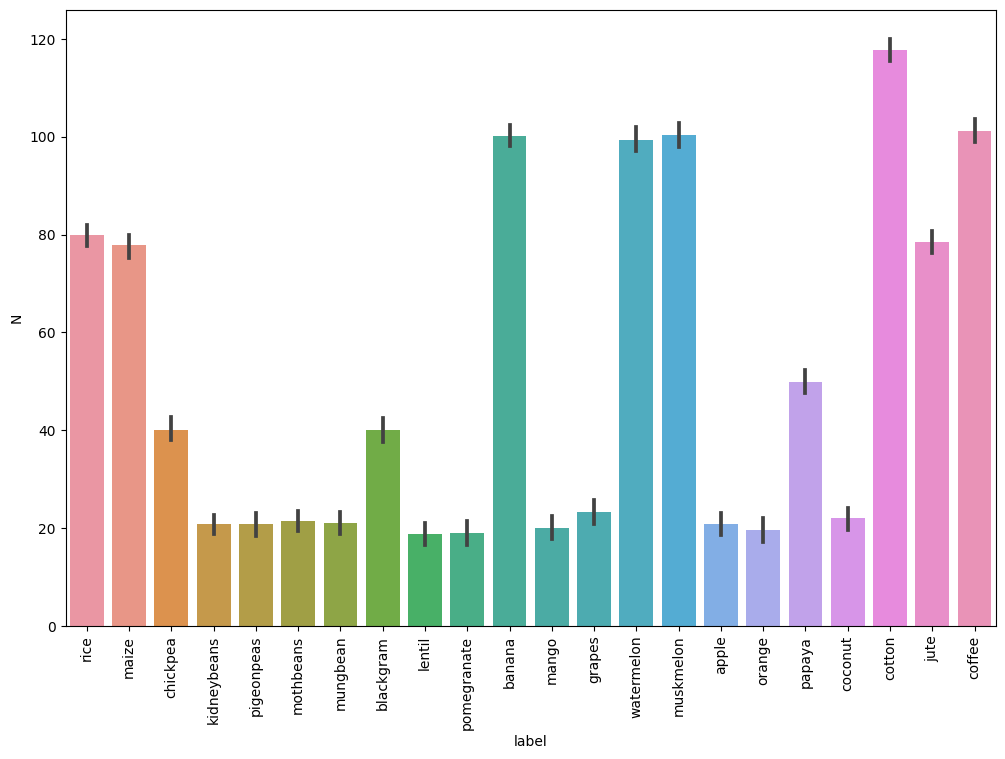

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

sns.barplot(y = "N", x='label', data = df)
plt.xticks(rotation = 90)
plt.show()

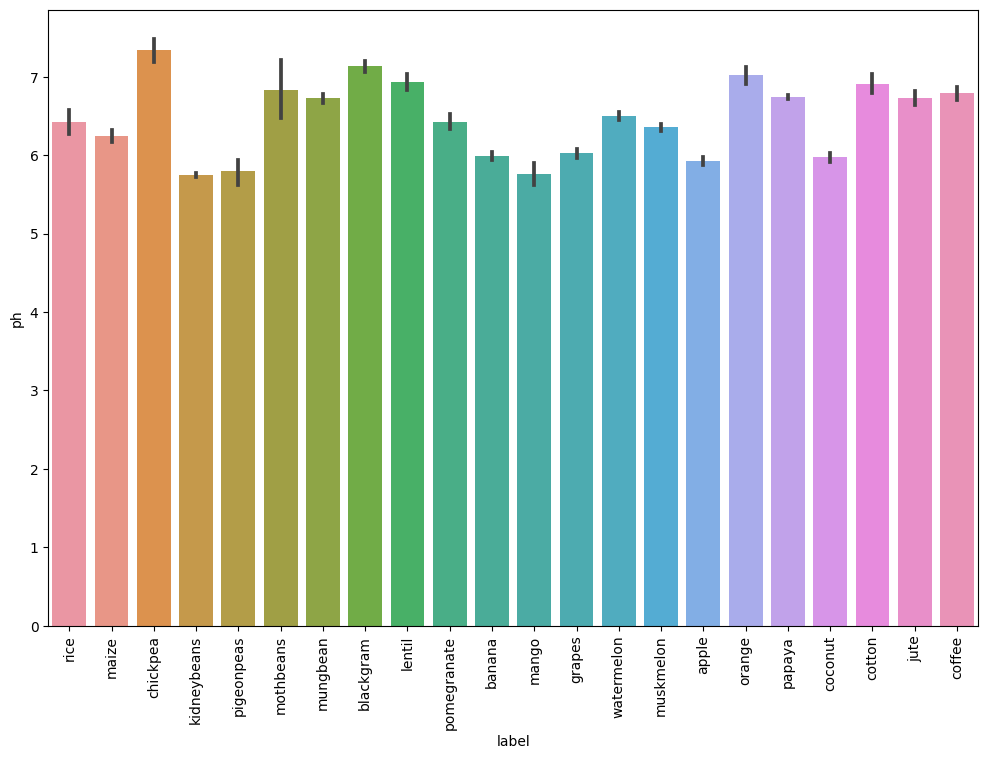

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

sns.barplot(y = "ph", x='label', data = df)
plt.xticks(rotation = 90)
plt.show()

In [25]:
X = df.drop('label', axis = 1)
y = df['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [53]:
#label Encoding

le = LabelEncoder()
categories = df['label']
encoded_labels = le.fit_transform(df['label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the original and encoded labels
print("Original Labels:", categories)
print("Encoded Labels:", encoded_labels)

Label Mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}
Original Labels: 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object
Encoded Labels: [20 20 20 ...  5  5  5]


## **Splitting the Train and Test Dataset**

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,encoded_labels,test_size=0.2, random_state = 42)

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_names = []
accuracy_ = []

## **Logistic Regression**

In [147]:
lr = LogisticRegression(max_iter=5000, random_state =42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, pred)
accuracy_.append(lr_acc)
model_names.append('Logistic Regression')
print('LOGISTIC REGRESSION ACCURACY: ', lr_acc)

print(classification_report(y_test, pred))

LOGISTIC REGRESSION ACCURACY:  0.9704545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.86      0.90      0.88        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       0.96      1.00      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
#Saving the model

import pickle
filename = '/content/LogisticRegression.pkl'
model = open(filename, 'wb')
pickle.dump(lr, model)
model.close()

<Axes: >

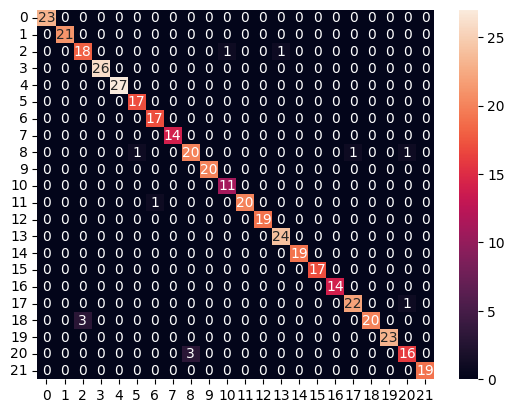

In [149]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

## **Naive Bayes**

In [150]:
NB = GaussianNB()
NB.fit(X_train,y_train)
pred_val = NB.predict(X_test)
nb_acc = accuracy_score(y_test,pred_val)
accuracy_.append(nb_acc)
model_names.append('GaussianNB')
print('Naive Bayes ACCURACY: ', nb_acc)

print(classification_report(y_test, pred_val))

Naive Bayes ACCURACY:  0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

In [151]:
#Saving the model

import pickle
filename = '/content/NaiveBayes.pkl'
model = open(filename, 'wb')
pickle.dump(NB, model)
model.close()

<Axes: >

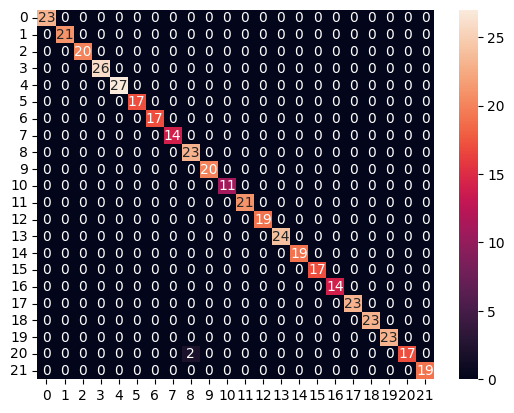

In [152]:
sns.heatmap(confusion_matrix(y_test,pred_val), annot=True)

## **Support vector machines**

In [153]:
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.fit_transform(X_test)

svc = SVC(kernel = 'poly', degree = 2, C=1)
svc.fit(X_train_scaled, y_train)
pred_val = svc.predict(X_test_scaled)

svc_acc = accuracy_score(y_test,pred_val)
accuracy_.append(svc_acc)
model_names.append('SVC')
print('Naive Bayes ACCURACY: ', svc_acc)

print(classification_report(y_test, pred_val))

Naive Bayes ACCURACY:  0.9681818181818181
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

In [154]:
#Saving the model

import pickle
filename = '/content/SVC.pkl'
model = open(filename, 'wb')
pickle.dump(svc, model)
model.close()

<Axes: >

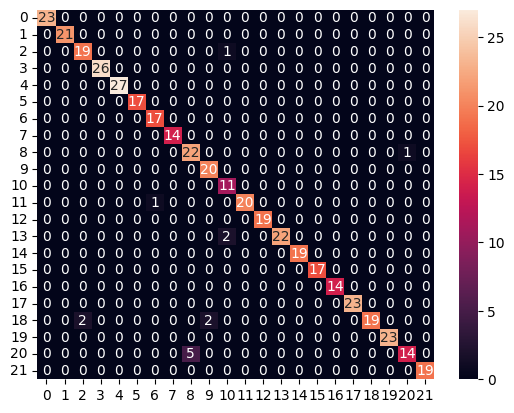

In [155]:
sns.heatmap(confusion_matrix(y_test,pred_val), annot=True)

## **RandomForest**

In [156]:
rf = RandomForestClassifier(n_estimators=21, random_state=0)
rf.fit(X_train, y_train)
pred_val = rf.predict(X_test)

rf_acc = accuracy_score(y_test,pred_val)
accuracy_.append(rf_acc)
model_names.append('Random Forest')
print('Randome Forest ACCURACY: ', rf_acc)

print(classification_report(y_test, pred_val))

Randome Forest ACCURACY:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

In [157]:
#Saving the model

import pickle
filename = '/content/RandomForest.pkl'
model = open(filename, 'wb')
pickle.dump(rf, model)
model.close()

<Axes: >

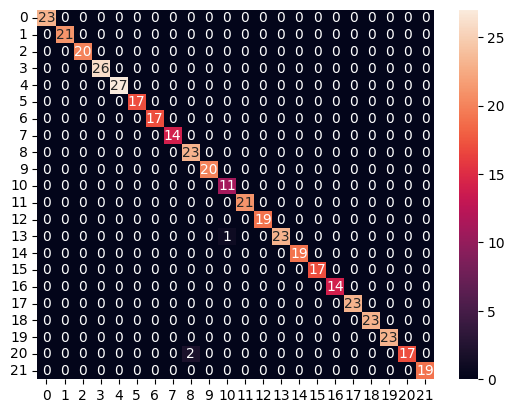

In [158]:
sns.heatmap(confusion_matrix(y_test,pred_val), annot=True)

## **XGBoost**

In [159]:
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

pred_val = xb.predict(X_test)

xgb_acc = accuracy_score(y_test,pred_val)
accuracy_.append(xgb_acc)
model_names.append('XGBoost')
print('Randome Forest ACCURACY: ', xgb_acc)

print(classification_report(y_test, pred_val))

Randome Forest ACCURACY:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

In [160]:
#Saving the model

import pickle
filename = '/content/XGBoost.pkl'
model = open(filename, 'wb')
pickle.dump(xb, model)
model.close()

<Axes: >

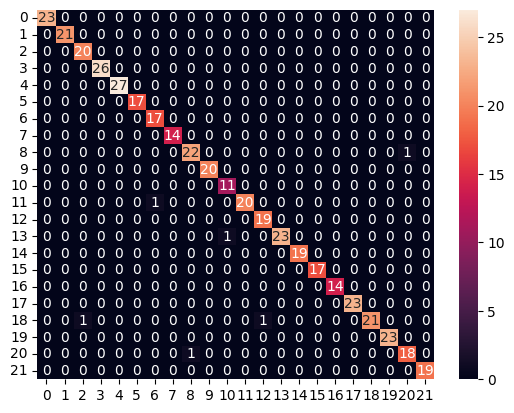

In [161]:
sns.heatmap(confusion_matrix(y_test,pred_val), annot=True)

## **Comparing Accuracy**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

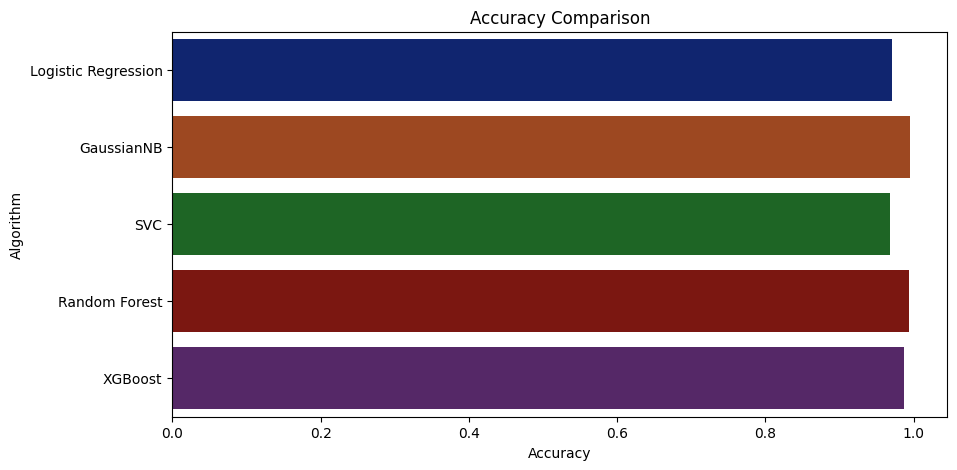

In [162]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_,y = model_names,palette='dark')

In [163]:
model_accuracy = dict(zip(model_names, accuracy_))
for k, v in model_accuracy.items():
    print (k, '==>', v)

Logistic Regression ==> 0.9704545454545455
GaussianNB ==> 0.9954545454545455
SVC ==> 0.9681818181818181
Random Forest ==> 0.9931818181818182
XGBoost ==> 0.9863636363636363


<Axes: >

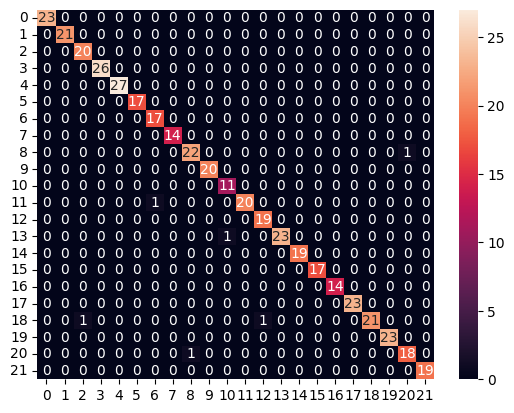

In [165]:
sns.heatmap(confusion_matrix(y_test,pred_val), annot=True)